1\. **Kernel Density Estimate**

Produce a KDE for a given distribution (by hand, not using seaborn!):

* Fill a numpy array, x,  of len(N) (with N=O(100)) with a variable normally distributed, with a given mean a standard deviation
* Fill an histogram in pyplot taking properly care about the aesthetic
   * use a meaningful number of bins
   * set a proper y axis label
   * set proper value of y axis major ticks labels (e.g. you want to display only integer labels)
   * display the histograms as data points with errors (the error being the poisson uncertainty)
* for every element of x, create a gaussian with the mean corresponding the element value and std as a parameter that can be tuned. The std default value should be:
$$ 1.06 * x.std() * x.size ^{-\frac{1}{5.}} $$
you can use the scipy function `stats.norm()` for that.
* In a separate plot (to be placed beside the original histogram), plot all the gaussian functions so obtained
* Sum (with np.sum()) all the gaussian functions and normalize the result such that the integral matches the integral of the original histogram. For that you could use the `scipy.integrate.trapz()` method


[4.78128656 9.41033989 2.86758952 4.04645673 5.66402031 4.42157682
 3.84080794 5.45591738 4.42848968 6.11147144 5.28578268 2.02553189
 5.821881   1.58148683 5.58144452 5.63728794 2.42342548 7.85181409
 1.31139524 2.01291181 2.67459171 4.14271682 4.45209632 5.55445755
 3.18586517 4.52261184 3.32046885 2.85513478 7.12393296 3.9291356
 5.34760462 2.33573931 5.09389869 5.94672387 3.33420015 4.37344747
 7.06088545 8.382897   3.7625548  5.02520527 3.29654973 2.65855506
 4.75835813 3.85429468 4.14264659 7.89054744 5.21015032 6.61844656
 4.83809806 6.43394793 6.72547507 7.80074381 6.16750948 1.73712152
 4.29249627 7.87656979 1.23551348 2.61904057 1.41841794 7.10592658
 7.14346592 6.69090427 2.02439953 2.3131174  4.44093292 4.2346086
 2.62239634 7.41882655 6.81423053 5.222081   3.81552596 1.28001849
 5.81521118 6.88764315 5.96151804 6.25929576 4.38763314 5.1484481
 6.12545442 8.22008284 7.47584954 6.03107368 3.20943534 5.93065334
 4.12847729 4.06532361 5.14880327 5.9882409  1.70522891 3.9249249

/tmp/ipykernel_215/60947073.py:42: DeprecationWarning: 'scipy.integrate.trapz' is deprecated in favour of 'scipy.integrate.trapezoid' and will be removed in SciPy 1.14.0
  integral = scipy.integrate.trapz(kde, np.linspace(x.min(),x.max(),1000)) # Integral under the sum pf gaussians


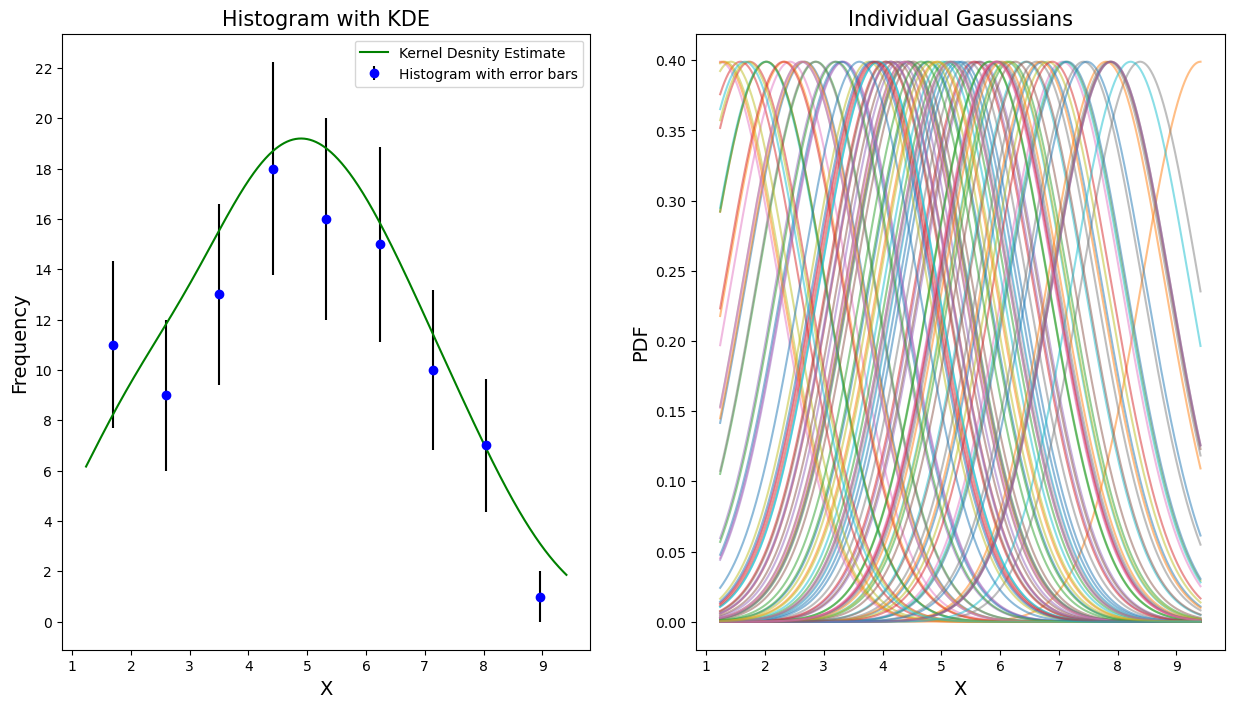

In [4]:
import  numpy as np 
from matplotlib import pyplot as plt
import numpy.random as npr
from matplotlib.ticker import MultipleLocator


N=100
x= npr.normal(5.,2.,N)
print(x)
bin_edges= np.linspace(x.min(),x.max(),int(np.sqrt(N)))
centers= (bin_edges[1:]+bin_edges[:-1])/2

hist,edges = np.histogram(x, bins=bin_edges)  # hist represents an array with the number of counts in each bin interval
erry = np.sqrt(hist)  # errors with Poisson uncertainty


fig, (ax1,ax2) = plt.subplots(1,2,figsize=(15, 8))

ax1.errorbar(centers,hist,yerr=erry,fmt='o',color='blue', ecolor='black',label='Histogram with error bars')
ax1.set_xlabel('X',fontsize=14)
ax1.set_ylabel('Frequency',fontsize=14)
ax1.set_title('Histogram with KDE',fontsize=15)
ax1.legend(loc='best')
ax1.yaxis.set_major_locator(MultipleLocator(2.000))

# KDE
import scipy
from scipy import stats

gaussians=[]

for xi in x:
    gauss= stats.norm.pdf(np.linspace(x.min(),x.max(),1000),loc=xi) # loc is the gauss center
    gaussians.append(gauss)
    ax2.plot(np.linspace(x.min(),x.max(),1000), gauss, alpha=0.5)  # Plot each Gaussian

ax2.set_xlabel('X',fontsize=14)
ax2.set_ylabel('PDF',fontsize=14)
ax2.set_title('Individual Gasussians',fontsize=15)

kde = np.sum(np.array(gaussians),axis=0) # the sum of gaussians is the KDE not normalised
integral = scipy.integrate.trapz(kde, np.linspace(x.min(),x.max(),1000)) # Integral under the sum pf gaussians
kde_norm = kde/integral

ax1.plot(np.linspace(x.min(),x.max(),1000), kde_norm*N, color='green', label="Kernel Desnity Estimate")
ax1.legend(loc='best')
plt.show()

2\. **Color-coded scatter plot**

Produce a scatter plot out of a dataset with two categories

* Write a function that generate a 2D datasets of 2 categories. Each category should distribute as a 2D gaussian with a given mean and std (clearly it is better to have different values means..)
* Display the dataset in a scatter plot marking the two categories with different marker colors.

An example is given below

You can try to make the procedure more general by allowing a given number $n\ge 2$ of categories

--2020-11-17 14:38:20--  https://www.dropbox.com/s/u4y3k4kk5tc7j46/two_categories_scatter_plot.png
Risoluzione di www.dropbox.com (www.dropbox.com)... 162.125.69.1
Connessione a www.dropbox.com (www.dropbox.com)|162.125.69.1|:443... connesso.
Richiesta HTTP inviata, in attesa di risposta... 301 Moved Permanently
Posizione: /s/raw/u4y3k4kk5tc7j46/two_categories_scatter_plot.png [segue]
--2020-11-17 14:38:20--  https://www.dropbox.com/s/raw/u4y3k4kk5tc7j46/two_categories_scatter_plot.png
Riutilizzo della connessione esistente a www.dropbox.com:443.
Richiesta HTTP inviata, in attesa di risposta... 302 Found
Posizione: https://ucf08e6905d1af2d3896db082fc4.dl.dropboxusercontent.com/cd/0/inline/BDXix2_dqdgaay0CqpUasoeq-d7qojUHdcsmMO4LSt4qx-6aIfFdyTse5ykuTp1AKTZzWHqB83UcrULRU6e9PqpgyW2Ud6gq_BVV1oIDp8Jfng/file# [segue]
--2020-11-17 14:38:21--  https://ucf08e6905d1af2d3896db082fc4.dl.dropboxusercontent.com/cd/0/inline/BDXix2_dqdgaay0CqpUasoeq-d7qojUHdcsmMO4LSt4qx-6aIfFdyTse5ykuTp1AKTZzWHqB83Ucr

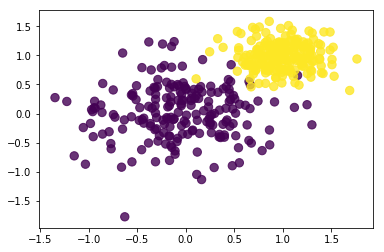

In [18]:
! wget https://www.dropbox.com/s/u4y3k4kk5tc7j46/two_categories_scatter_plot.png
from IPython.display import Image
Image('two_categories_scatter_plot.png')

           x1        y1        x2        y2
0    1.296964  2.684136  2.775582  1.676476
1   -0.498986  1.552926  2.523907  3.297114
2   -0.503820  0.425648  4.435343  3.203261
3   -0.345618  0.386817  2.484589  2.872622
4    0.597092  0.167333  4.609403  4.988841
..        ...       ...       ...       ...
195 -0.499659  0.478161  3.363592  3.021978
196 -1.400265 -0.696222  3.028316  2.317626
197  1.531014  0.464426  4.502910  1.283877
198  0.877028 -0.091125  2.395937  0.431042
199  0.773191 -0.204639  5.217401  5.111935

[200 rows x 4 columns]


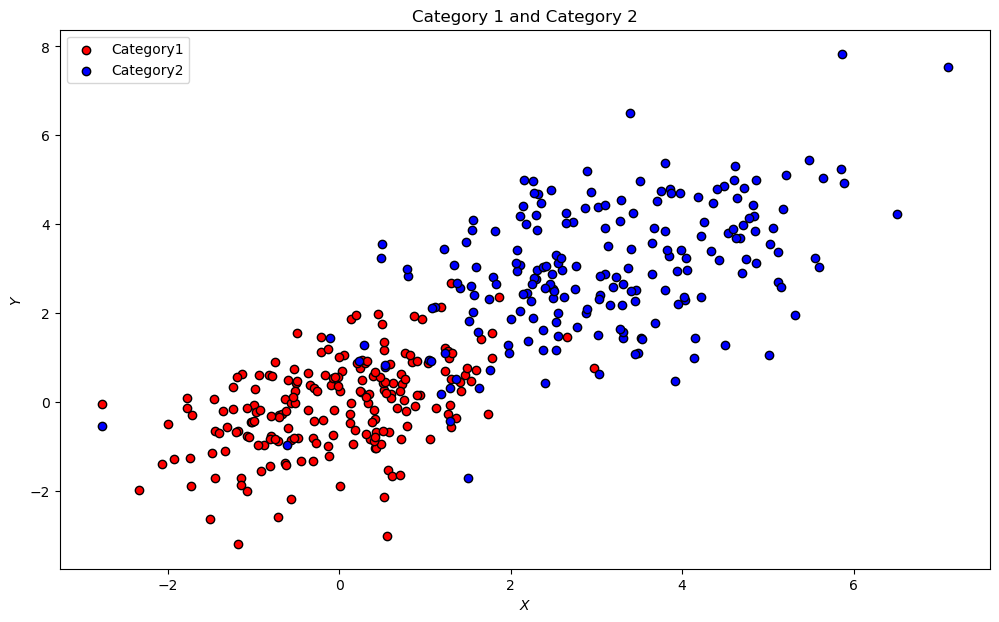

In [21]:
import numpy as np
import numpy.random as npr
from matplotlib import pyplot as plt
import pandas as pd

def bidim_gauss(mean1,mean2,sigma1,sigma2,N):
    df = pd.DataFrame(npr.multivariate_normal(mean1,sigma1,N),columns=['x1','y1'])
    df2= pd.DataFrame(npr.multivariate_normal(mean2,sigma2,N),columns=['x2','y2'])
    df['x2']= df2['x2']
    df['y2']= df2['y2']
    return(df)
    
mean1=[0,0]
sigma1= [[1,0.5],[0.5,1]]
mean2=[3,3]
sigma2= [[2,1],[1,2]]
df= bidim_gauss(mean1,mean2,sigma1,sigma2,200)
print(df)

fig, ax = plt.subplots(figsize=(12, 7))

ax.scatter(df['x1'],df['y1'] , marker='o', c='r', edgecolor='black',label='Category1')
ax.scatter(df['x2'],df['y2'] , marker='o', c='b', edgecolor='black',label='Category2')
ax.set_title('Category 1 and Category 2')
ax.set_xlabel('$X$')
ax.set_ylabel('$Y$')
ax.legend(loc='best')

3\. **Profile plot**

Produce a profile plot from a scatter plot.
* Download the following dataset and load it as a pandas dataframe:
```bash
wget https://www.dropbox.com/s/hgnvyj9abatk8g6/residuals_261.npy
```
Note that you should use the `np.load()` function to load the file as a numpy array, call the `.item()` method, and then pass it to the `pd.DataFrame()` constructor.
* Inspect the dataset, you'll find two variables (features)
* Clean the sample by selecting the entries (rows) with the variable "residual" in absolute value smaller than 2
* perform a linear regression of "residuals" versus "distances" using `scipy.stats.linregress()` 
* plot a seaborn jointplot of  "residuals" versus "distances", having seaborn performing a linear regression. The result of the regression should be displayed on the plot
* Fill 3 numpy arrays
  * x, serving as an array of bin centers for the "distance" variable. It should range from 0 to 20 with reasonable number of steps (bins)
  * y, the mean values of the "residuals", estimated in slices (bins) of "distance"
  * erry, the standard deviation of the  of the "residuals", estimated in slices (bins) of "distance"
* Plot the profile plot on top of the scatter plot

In [20]:
! wget https://www.dropbox.com/s/hgnvyj9abatk8g6/residuals_261.npy

--2024-12-24 10:26:21--  https://www.dropbox.com/s/hgnvyj9abatk8g6/residuals_261.npy
Resolving proxy.server (proxy.server)... 10.0.0.51
Connecting to proxy.server (proxy.server)|10.0.0.51|:3128... connected.
Proxy request sent, awaiting response... 302 Found
Location: https://www.dropbox.com/scl/fi/cu0wjpyhyoy57w9yupavt/residuals_261.npy?rlkey=9rx6zjagfspm9mfc1jc3zejbt [following]
--2024-12-24 10:26:21--  https://www.dropbox.com/scl/fi/cu0wjpyhyoy57w9yupavt/residuals_261.npy?rlkey=9rx6zjagfspm9mfc1jc3zejbt
Reusing existing connection to www.dropbox.com:443.
Proxy request sent, awaiting response... 302 Found
Location: https://uc0547ead4d9b248f8d5e084f8e8.dl.dropboxusercontent.com/cd/0/inline/Cg1jfVVMqz-avR_IEr4YokcrIxMtX4pOgM7ZynkYfgqdodhe8_HkNqUzMQYs4SSe9MQ1qAS14yb7zXB00o0sGhkP-s5zGiZIgDU3iD2GUnV8xHVkP7vuk6LLAi1H5RSy2ow/file# [following]
--2024-12-24 10:26:22--  https://uc0547ead4d9b248f8d5e084f8e8.dl.dropboxusercontent.com/cd/0/inline/Cg1jfVVMqz-avR_IEr4YokcrIxMtX4pOgM7ZynkYfgqdodhe8_

/opt/conda/envs/anaconda-ai-2024.04-py310/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/envs/anaconda-ai-2024.04-py310/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


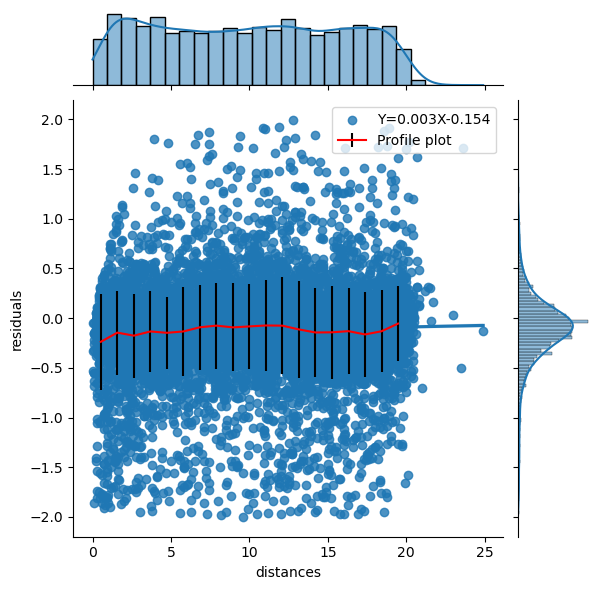

In [23]:
import scipy
from scipy import stats
import seaborn as sns


data= np.load('residuals_261.npy', allow_pickle=True)
df= pd.DataFrame(data.item())

df= df[np.abs(df['residuals'])<2]

scipy.stats.linregress(df['distances'],df['residuals'])
sns.jointplot(x="distances", y="residuals",data=df, kind="reg", label='Y=0.003X-0.154')
plt.legend(loc='best')

bins_edges= np.linspace(0,20,20)
x = (bins_edges[1:]+bins_edges[:-1])/2

y = []
erry = []
# Calculate mean and std deviation of residuals for each bin
for i in range(len(bins_edges) - 1):
    mask = (df['distances'] >= bins_edges[i]) & (df['distances'] < bins_edges[i + 1])
    residuals = df['residuals'][mask] 
    y.append(residuals.mean()) # Append mean and std deviation of residuals in this this bin
    erry.append(residuals.std())

y = np.array(y)
erry = np.array(erry)

plt.errorbar(x,y,yerr=erry, color='red',ecolor='black', label = 'Profile plot')
plt.legend()
plt.show()